Lab Lecture: week 8 

Ensemple: Grould of items viewed as a whole rather than the individual.

    

# 0.) Import and Clean data

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
df = pd.read_csv("bank-additional-full (1).csv", sep = ";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

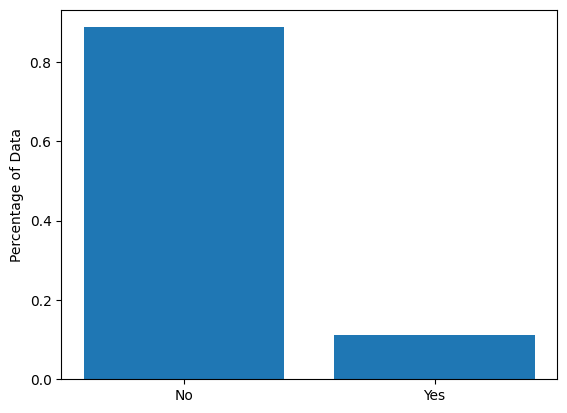

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
len(X_scaled)

28831

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)

X_scaled, y_train = smote.fit_resample(X_train, y_train)

In [14]:
# Checking class distributions after transforming the data
from collections import Counter
print(sorted(Counter(y_train).items()))

[('yes', 1)]


# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [15]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.5\ngini = 0.375\nsamples = 24040\nvalue = [18034, 6006]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 133.5\ngini = 0.452\nsamples = 16964\nvalue = [11100, 5864]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.278\nsamples = 7650\nvalue = [6376, 1274]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9314\nvalue = [4724, 4590]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 0.5\ngini = 0.039\nsamples = 7076\nvalue = [6934, 142]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.031\nsamples = 6991\nvalue = [6881, 110]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 85\nvalue = [53, 32]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.402\nsamples = 27120\nvalue = [7546, 19574]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.5\ngini = 0.316\nsamples = 22973\nvalue = [4520, 18453]\nclass = Yes'),
 Te

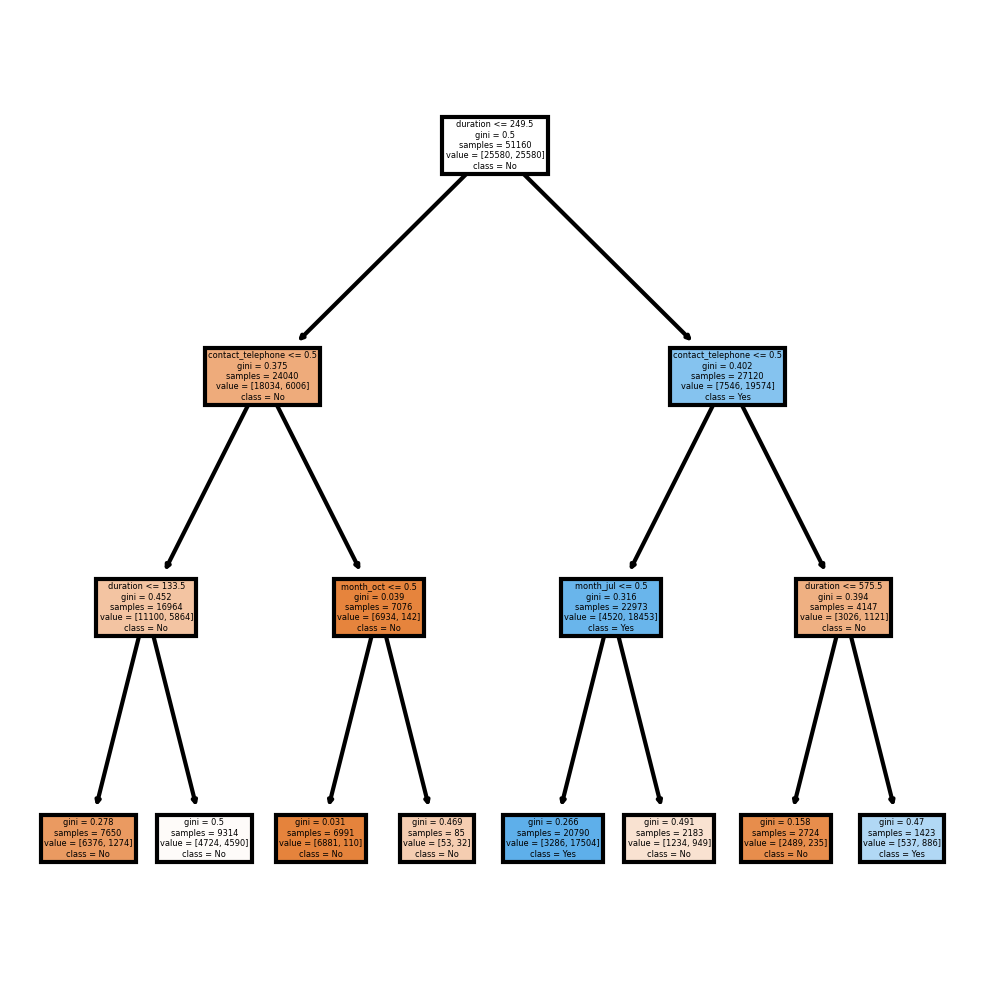

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [17]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

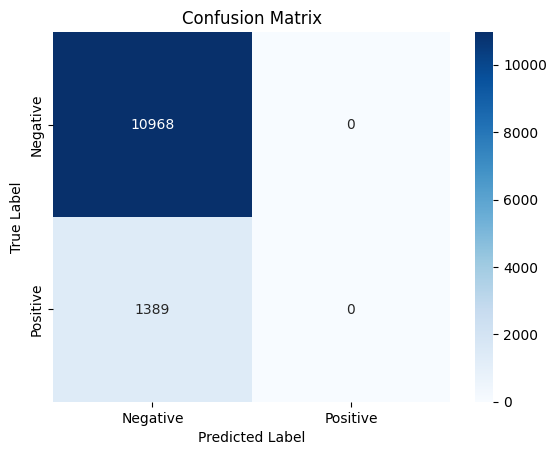

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [19]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [20]:
bagging = BaggingClassifier(estimator = dtree,
                          n_estimators = 100,
                          max_samples = 0.5,
                          max_features = 1)

In [21]:
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)

In [22]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

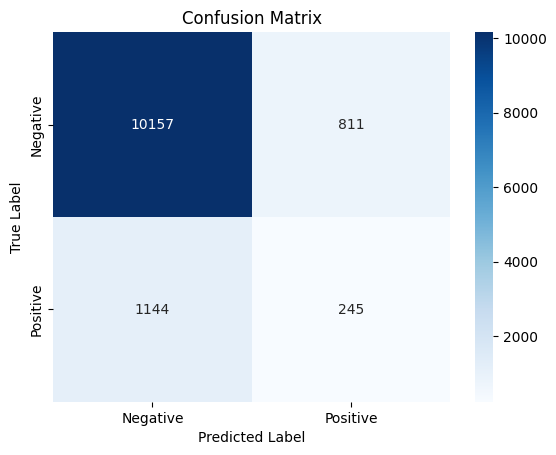

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
dtree = DecisionTreeClassifier(max_depth = 3)


In [26]:
boost = AdaBoostClassifier(estimator = dtree,
                          n_estimators = 100,
                          learning_rate = 0.1
                          )

In [27]:
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)

In [28]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

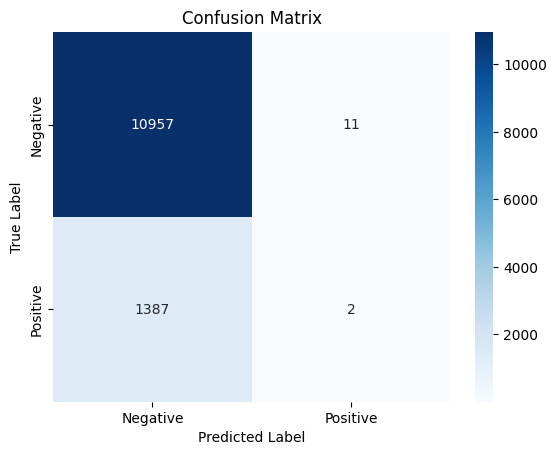

In [29]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [30]:
#pip install mlens

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
base_predictions = [list(dtree_main.predict(X_scaled)),
                    list(boost.predict(X_scaled)),
                    list(bagging.predict(X_scaled))]

In [33]:
base_predictions = np.array(base_predictions).transpose()

In [34]:
super_learner = LogisticRegression()

In [37]:
super_learner.fit(base_predictions, y_train)

LogisticRegression()

In [38]:
super_learner.coef_

array([[1.01114525, 3.74863408, 1.78914918]])

based on the results, the boosted model outperforms the other models as shown at coefficient result 3.748 as the higher result